In [2]:
# %matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import itertools
sns.set(style="whitegrid", font_scale=1.5)




Text(0.5, 1.0, 'LOANS:3-way marginals')

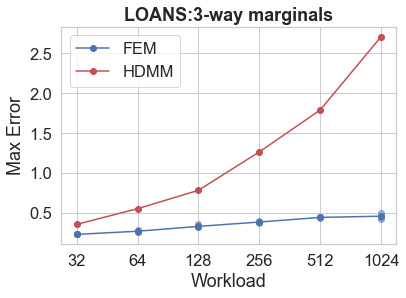

In [3]:
ds = 'loans'
marginal = 3
workload = [32, 64, 128, 256, 512, 1024]
# workload = [32, 64, 128, 256]
epsilon=0.1

fem_mean_error = []
for i, w in enumerate(workload) :
    path = '../Results/{}_{}_{}.csv'.format(ds, w, marginal)
    
    df = pd.read_csv(path)
#     print(df)
    df = df.loc[df['epsilon']==epsilon]
    g = df.groupby(['epsilon_0', 'noise']).agg({'error': ['mean']})
    idx = g.idxmin()
    eps0 = idx[0][0]
    noise= idx[0][1]
    df_min = df[(df['epsilon_0']==eps0) & (df['noise']==noise)]
    errors = df_min['error'].values
    for e in errors:
        plt.plot(i, e, 'o', c='b', alpha=0.5)
    fem_mean_error.append(np.mean(errors))


hdmm_error = []
for i, w in enumerate(workload) :
    path = '../../hdmm/Results/{}_{}_{}.csv'.format(ds, w, marginal)
    df = pd.read_csv(path)
    df = df.loc[df['epsilon']==epsilon]
    error = df['error'].values.mean()
    hdmm_error.append(error)
    

plt.plot(range(len(workload)), fem_mean_error, '-o', c='b', label='FEM')
plt.plot(range(len(workload)), hdmm_error, '-o', c='r', label='HDMM')
plt.xticks(range(len(workload)), workload)
plt.xlabel('Workload')
plt.ylabel('Max Error')


plt.legend()
plt.title('{}:{}-way marginals'.format(ds.upper(), marginal, epsilon), fontweight="bold")

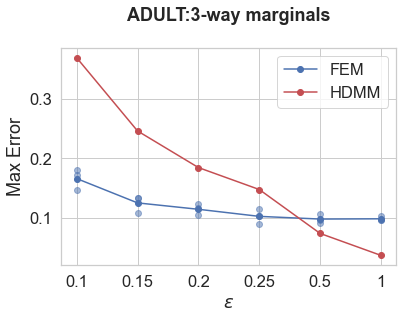

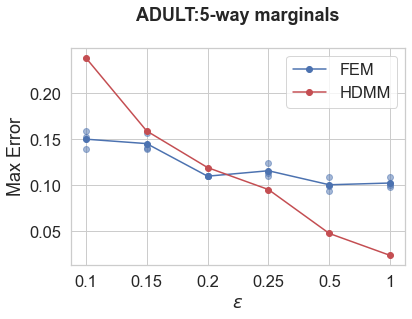

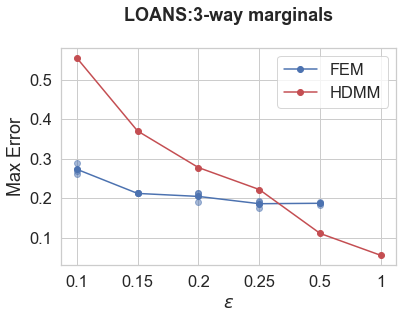

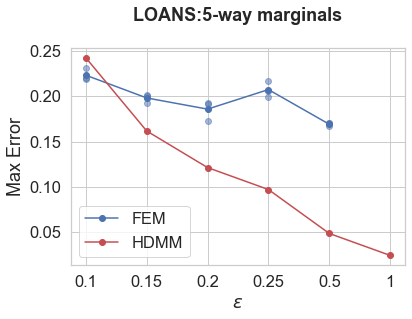

In [4]:
# print("Plot. error vs epsilon")

dataset_arr = ['adult', 'loans']
marginal_arr = [3, 5]
workload = 64
epsilon_arr=[0.1, 0.15, 0.2, 0.25, 0.5, 1]



for D, M in itertools.product(dataset_arr, marginal_arr):
#     plt.clf()

    fem_mean_error = []
    fem_eps = []
    for i, epsilon in enumerate(epsilon_arr) :
        path = '../Results/{}_{}_{}.csv'.format(D, workload, M)

        df = pd.read_csv(path)
    #     print(df)
        df = df.loc[df['epsilon']==epsilon]
        if len(df) == 0:continue
        g = df.groupby(['epsilon_0', 'noise']).agg({'error': ['mean']})
        idx = g.idxmin()
        eps0 = idx[0][0]
        noise= idx[0][1]
        df_min = df[(df['epsilon_0']==eps0) & (df['noise']==noise)]
        errors = df_min['error'].values
        for e in errors:
            plt.plot(i, e, 'o', c='b', alpha=0.5)
        fem_mean_error.append(np.mean(errors))
        fem_eps.append(i)


    hdmm_error = []
    hdmm_eps = []
    for i, epsilon in enumerate(epsilon_arr) :
        path = '../../hdmm/Results/{}_{}_{}.csv'.format(D, workload, M)
        df = pd.read_csv(path)
        df = df.loc[df['epsilon']==epsilon]
        if len(df) == 0:continue
        error = df['error'].values.mean()
        hdmm_error.append(error)
        hdmm_eps.append(i)
    

    plt.plot(fem_eps, fem_mean_error, '-o', c='b', label='FEM')
    plt.plot(hdmm_eps, hdmm_error, '-o', c='r', label='HDMM')
    plt.xticks(range(len(epsilon_arr)), epsilon_arr)
    plt.xlabel(r'$\epsilon$')
    plt.ylabel('Max Error')


    plt.legend()
    plt.title('{}:{}-way marginals\n'.format(D.upper(), M, epsilon), fontweight="bold")
#     plt.show()
    plt.savefig('../Results/{}{}eps.png'.format(D.upper(), M))
    
    


[]

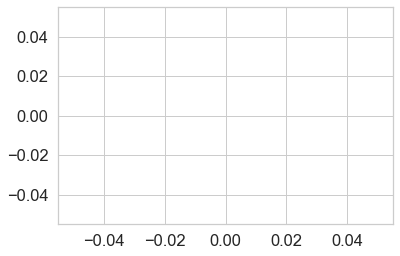

In [4]:
plt.plot()